In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [2]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [4]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [5]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [7]:
model.layers

In [8]:
for layer in model.layers[:10]:
    layer.traiable = False

In [9]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(lr = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

d:\python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Data Augumentation

In [10]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [12]:
history = model_final.fit_generator(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

Epoch 1/15


<ipython-input-12-8ff83239e714>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_final.fit_generator(


13/13 [==============================] - 25s 2s/step - loss: 0.0409 - accuracy: 0.9900 - val_loss: 0.1443 - val_accuracy: 0.9312
Epoch 2/15
13/13 [==============================] - 26s 2s/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.1052 - val_accuracy: 0.9375
Epoch 3/15
13/13 [==============================] - 26s 2s/step - loss: 0.0311 - accuracy: 0.9925 - val_loss: 0.1641 - val_accuracy: 0.9250
Epoch 4/15
13/13 [==============================] - 25s 2s/step - loss: 0.0241 - accuracy: 0.9976 - val_loss: 0.2021 - val_accuracy: 0.9187
Epoch 5/15
13/13 [==============================] - 24s 2s/step - loss: 0.0231 - accuracy: 0.9975 - val_loss: 0.1273 - val_accuracy: 0.9375
Epoch 6/15
13/13 [==============================] - 24s 2s/step - loss: 0.0229 - accuracy: 0.9950 - val_loss: 0.1132 - val_accuracy: 0.9438
Epoch 7/15
13/13 [==============================] - 24s 2s/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.1018 - val_accuracy: 0.9500
Epoch 8/15
13/13 [=============

In [14]:
history.history

{'loss': [0.04091024026274681,
  0.03308452293276787,
  0.03113832324743271,
  0.024135930463671684,
  0.02314394898712635,
  0.022893469780683517,
  0.030818838626146317,
  0.028349168598651886,
  0.019360944628715515,
  0.025422777980566025,
  0.02055121399462223,
  0.01666790060698986,
  0.0192642230540514,
  0.01596599444746971,
  0.01894940435886383],
 'accuracy': [0.9900000095367432,
  0.9900000095367432,
  0.9925000071525574,
  0.9975961446762085,
  0.9975000023841858,
  0.9950000047683716,
  0.9900000095367432,
  0.9925000071525574,
  0.9975000023841858,
  0.9900000095367432,
  0.9975000023841858,
  0.9975000023841858,
  0.9900000095367432,
  0.9975000023841858,
  0.9975000023841858],
 'val_loss': [0.14426998794078827,
  0.10518968105316162,
  0.16408172249794006,
  0.2020951211452484,
  0.1273055225610733,
  0.11319360882043839,
  0.1017620712518692,
  0.10730527341365814,
  0.155594140291214,
  0.09806577861309052,
  0.1962229311466217,
  0.10688270628452301,
  0.127164408564

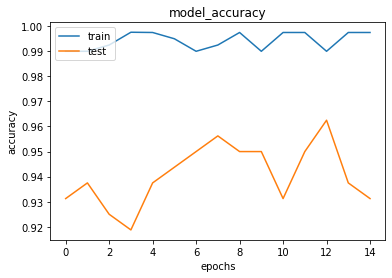

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

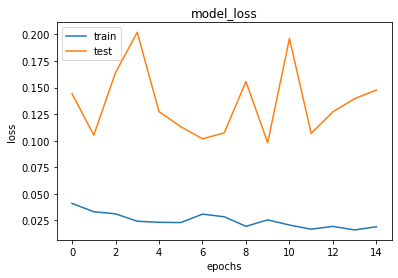

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_final.save('model_final.h5')

In [18]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [19]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [26]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [27]:
make_prediction("roi_1.png")

1/1 [==============================] - 0s 62ms/step


'car'

In [28]:
make_prediction("spot169.jpg")

1/1 [==============================] - 0s 53ms/step


'no_car'

In [29]:
model_final.save("model_final.h5")